In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('Tesla.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
data.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988
1691,3/17/2017,264.000000,265.329987,261.200012,261.500000,6475900,261.500000


In [5]:
length_data = len(data)
split_ratio = 0.7
length_train = round(length_data*split_ratio)
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1692
Train data length : 1184
Validation data lenth : 508


In [6]:
data_training = data[:length_train]
data_training

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1179,3/6/2015,199.210007,200.750000,192.149994,193.880005,6712400,193.880005
1180,3/9/2015,194.389999,194.490005,188.250000,190.880005,6736700,190.880005
1181,3/10/2015,188.460007,193.500000,187.600006,190.320007,5579700,190.320007
1182,3/11/2015,191.149994,196.179993,191.009995,193.740005,4974900,193.740005


In [7]:
data_test = data[length_train:]
data_test

,Date,Open,High,Low,Close,Volume,Adj Close
1184,3/13/2015,188.949997,191.750000,187.320007,188.679993,5434300,188.679993
1185,3/16/2015,192.000000,195.910004,189.800003,195.699997,5628800,195.699997
1186,3/17/2015,195.429993,198.710007,193.940002,194.729996,4894100,194.729996
1187,3/18/2015,194.960007,200.880005,193.110001,200.710007,4820900,200.710007
1188,3/19/2015,202.000000,204.589996,194.529999,195.649994,8475200,195.649994
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [8]:
training_data = data_training.drop(['Date','Adj Close'],axis=1)
training_data.head()

,Open,High,Low,Close,Volume
0,19.000000,25.00,17.540001,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,8218800
3,23.000000,23.10,18.709999,19.200001,5139800
4,20.000000,20.00,15.830000,16.110001,6866900


In [9]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.01053291, 0.03045963, 0.00964509, 0.02993635, 0.50337694],
       [0.03553936, 0.05018378, 0.03134654, 0.02971433, 0.46074816],
       [0.03262991, 0.03380764, 0.01993068, 0.02279455, 0.21865873],
       ...,
       [0.634626  , 0.64365513, 0.6503655 , 0.64579633, 0.14741911],
       [0.64453278, 0.653408  , 0.66321302, 0.65845174, 0.1310932 ],
       [0.65410817, 0.6471123 , 0.65846584, 0.64857164, 0.10880703]])

In [10]:
X_train = []
y_train = []

In [11]:
for i in range(60,length_train):
    X_train.append(training_data[i-60:i])
    y_train.append(training_data[i])

In [12]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
X_train.shape, y_train.shape

((1124, 60, 5), (1124, 5))

# LSTM

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [15]:
regressior = Sequential()
regressior.add(LSTM(units = 50,activation='relu',return_sequences=True,input_shape = (X_train.shape[1],5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60,activation='relu',return_sequences=True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80,activation='relu',return_sequences=True))
regressior.add(Dropout(0.4))

regressior.add(LSTM(units = 120,activation='relu'))
regressior.add(Dropout(0.5))

regressior.add(Dense(units = 5))

In [16]:
regressior.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [17]:
regressior.compile(optimizer="adam",loss="mean_squared_error",metrics=['accuracy'])

In [18]:
regressior.fit(X_train,y_train,epochs=30,batch_size=32)

Epoch 1/30
36/36 [==============================] - 9s 126ms/step - loss: 0.0583 - accuracy: 0.2206
Epoch 2/30
36/36 [==============================] - 5s 125ms/step - loss: 0.0205 - accuracy: 0.2740
Epoch 3/30
36/36 [==============================] - 5s 127ms/step - loss: 0.0134 - accuracy: 0.2722
Epoch 4/30
36/36 [==============================] - 5s 126ms/step - loss: 0.0128 - accuracy: 0.2456
Epoch 5/30
36/36 [==============================] - 5s 125ms/step - loss: 0.0120 - accuracy: 0.2749
Epoch 6/30
36/36 [==============================] - 5s 125ms/step - loss: 0.0106 - accuracy: 0.2340
Epoch 7/30
36/36 [==============================] - 5s 125ms/step - loss: 0.0097 - accuracy: 0.2714
Epoch 8/30
36/36 [==============================] - 5s 135ms/step - loss: 0.0090 - accuracy: 0.2918
Epoch 9/30
36/36 [==============================] - 5s 146ms/step - loss: 0.0088 - accuracy: 0.2518
Epoch 10/30
36/36 [==============================] - 5s 145ms/step - loss: 0.0082 - accuracy: 0.2678

In [19]:
past_60_day = data_training.tail(60)

In [20]:
df = past_60_day.append(data_test,ignore_index=True)

C:\Users\Windows\AppData\Local\Temp\ipykernel_9980\4270961980.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_60_day.append(data_test,ignore_index=True)


In [21]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,12/15/2014,209.289993,209.800003,202.669998,204.039993,5218300,204.039993
1,12/16/2014,200.889999,203.679993,195.369995,197.809998,8426100,197.809998
2,12/17/2014,193.059998,206.649994,192.649994,205.820007,7367800,205.820007
3,12/18/2014,212.380005,218.440002,211.800003,218.259995,7483300,218.259995
4,12/19/2014,220.190002,220.399994,214.500000,219.289993,6910500,219.289993
...,...,...,...,...,...,...,...
563,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
564,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
565,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
566,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [22]:
df = df.drop(["Date","Adj Close"],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,209.289993,209.800003,202.669998,204.039993,5218300
1,200.889999,203.679993,195.369995,197.809998,8426100
2,193.059998,206.649994,192.649994,205.820007,7367800
3,212.380005,218.440002,211.800003,218.259995,7483300
4,220.190002,220.399994,214.500000,219.289993,6910500


In [23]:
inputs = scaler.transform(df)
inputs

array([[0.71133939, 0.70297316, 0.7071434 , 0.69656597, 0.13766352],
       [0.6804036 , 0.68070157, 0.67963981, 0.6735124 , 0.22425456],
       [0.65156701, 0.69150983, 0.6693919 , 0.70315276, 0.19568691],
       ...,
       [0.88704743, 0.88929724, 0.90155229, 0.88784039, 0.12682006],
       [0.90693471, 0.90658317, 0.91959914, 0.91122698, 0.18846874],
       [0.91282727, 0.90505468, 0.92766189, 0.9091918 , 0.17161105]])

In [24]:
X_test = []
y_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i])

In [25]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((508, 60, 5), (508, 5))

In [26]:
y_pred = regressior.predict(X_test)

16/16 [==============================] - 1s 39ms/step


In [27]:
scaler.scale_

array([3.68283412e-03, 3.63914243e-03, 3.76761368e-03, 3.70041432e-03,
       2.69939048e-08])

In [28]:
scale  =1/3.68283412e-03
scale

271.5300139556652

In [29]:
y_pred = y_pred/scaler.scale_
y_test_1 = y_test/scaler.scale_

In [30]:
y_pred.shape

(508, 5)

#### Visualization

In [31]:
y_test_open = y_test_1[:,0]
y_pred_open = y_pred[:,0]
y_test_open.shape

(508,)

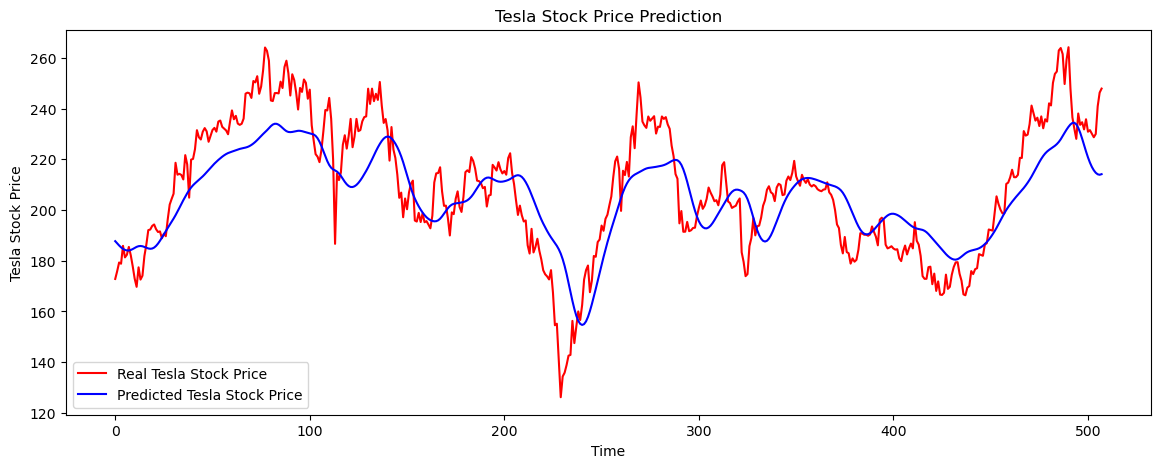

In [32]:

plt.figure(figsize=(14,5))
plt.plot(y_test_open,color="red",label="Real Tesla Stock Price")
plt.plot(y_pred_open,color="blue",label="Predicted Tesla Stock Price")
plt.title("Tesla Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

In [33]:
len(X_test)

508

### Dự đoán 14 ngày

In [108]:
last_60 = []
for i in range(60):
    last_60.append(X_test[507][i].tolist())

In [109]:
predict_14_day = []

In [110]:
for i in range(14):
    tmp = np.array(last_60)
    next_day = regressior.predict(tmp.reshape(1,60,5))
    predict_14_day.append(next_day.reshape(5).tolist())
    last_60.append(next_day.reshape(5).tolist())
    last_60 = last_60[1:]

1/1 [==============================] - 0s 41ms/step


In [111]:
1/scaler.scale_

array([2.71530014e+02, 2.74790014e+02, 2.65419994e+02, 2.70240009e+02,
       3.70454000e+07])

In [112]:
predict_14_day = predict_14_day/scaler.scale_
predict_14_day

array([[2.05094303e+02, 2.08017703e+02, 2.00852780e+02, 2.05061123e+02,
        5.75540475e+06],
       [2.05113482e+02, 2.08023370e+02, 2.00869740e+02, 2.05051845e+02,
        5.76360279e+06],
       [2.04777379e+02, 2.07673814e+02, 2.00539729e+02, 2.04700233e+02,
        5.77117098e+06],
       [2.04007534e+02, 2.06890025e+02, 1.99788456e+02, 2.03925540e+02,
        5.77958983e+06],
       [2.02815079e+02, 2.05682255e+02, 1.98627091e+02, 2.02734176e+02,
        5.79033709e+06],
       [2.01269465e+02, 2.04119361e+02, 1.97122900e+02, 2.01190718e+02,
        5.80449750e+06],
       [1.99466776e+02, 2.02296241e+02, 1.95368717e+02, 1.99386591e+02,
        5.82267605e+06],
       [1.97505576e+02, 2.00310546e+02, 1.93459781e+02, 1.97416878e+02,
        5.84499475e+06],
       [1.95472696e+02, 1.98248427e+02, 1.91480191e+02, 1.95366450e+02,
        5.87117703e+06],
       [1.93436547e+02, 1.96177955e+02, 1.89496362e+02, 1.93303055e+02,
        5.90068855e+06],
       [1.91446037e+02, 1.9414

In [113]:
import plotly.express as px
from itertools import cycle

def plot14nextday(y_test_open,predict_14_day):
    temp_mat = np.empty((60+14+1,1))
    temp_mat[:] = np.nan
    temp_mat = temp_mat.reshape(1,-1).tolist()[0]

    last_original_days_value = temp_mat
    next_predicted_days_value = temp_mat

    last_original_days_value[0:+1] = y_test_open[len(y_test_open)-60:].reshape(1,-1).tolist()[0]
    next_predicted_days_value[60+1:] = predict_14_day[:,0].reshape(-1,1).reshape(1,-1).tolist()[0]
    new_pred_plot = pd.DataFrame({
        'last_original_days_value':last_original_days_value,
        'next_predicted_days_value':next_predicted_days_value
    })
    names = cycle(['Test open data','Predicted next 14 days open price'])

    fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                          new_pred_plot['next_predicted_days_value']],
                  labels={'value': 'Stock price','index': 'Timestamp'})
    fig.update_layout(title_text='next 14 days',
                      plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Open Price')
    fig.for_each_trace(lambda t:  t.update(name = next(names)))

    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    fig.show()
    
plot14nextday(y_test_open,predict_14_day)

### Dự đoán 7 tuần

In [114]:
last_60 = []
for i in range(60):
    last_60.append(X_test[507][i].tolist())

In [115]:
predict_7_week = []

In [116]:
for i in range(7*7):
    tmp = np.array(last_60)
    next_day = regressior.predict(tmp.reshape(1,60,5))
    if((i+1) % 7 ==0):
        predict_7_week.append(next_day.reshape(5).tolist())
    last_60.append(next_day.reshape(5).tolist())
    last_60 = last_60[1:]

1/1 [==============================] - 0s 34ms/step


In [117]:
predict_7_week/scaler.scale_

array([[1.99466776e+02, 2.02296241e+02, 1.95368717e+02, 1.99386591e+02,
        5.82267605e+06],
       [1.85993205e+02, 1.88548597e+02, 1.82231918e+02, 1.85667315e+02,
        6.03822530e+06],
       [1.76472815e+02, 1.78594274e+02, 1.72896506e+02, 1.75682690e+02,
        6.27646311e+06],
       [1.69895487e+02, 1.71685974e+02, 1.66404930e+02, 1.68739816e+02,
        6.48248727e+06],
       [1.65043567e+02, 1.66796800e+02, 1.61615012e+02, 1.63728319e+02,
        6.70011101e+06],
       [1.61070463e+02, 1.62828013e+02, 1.57727720e+02, 1.59621359e+02,
        6.91459376e+06],
       [1.57701961e+02, 1.59428110e+02, 1.54474694e+02, 1.56207216e+02,
        7.15456932e+06]])

### Loss and Accuracy

In [118]:
from sklearn.exceptions import NotFittedError
import timeit
import pickle
import sys

def train_clf(clf, x_train, y_train, sample_weight=None, refit=False):
    train_time = 0
    
    try:
        if refit:
            raise NotFittedError
        y_pred_train = clf.predict(x_train)
        
        # For neural nets
        y_pred_train = np.where(y_pred_train.flatten() > 0.5, 1, 0)
        
    except NotFittedError:
        start = timeit.default_timer()
        
        if sample_weight is not None:
            clf.fit(x_train, y_train, sample_weight=sample_weight)
        else:
            clf.fit(x_train, y_train)
        
        end = timeit.default_timer()
        train_time = end - start
        
        y_pred_train = clf.predict(x_train)
    
    return clf, train_time

In [119]:
import math
def report(clf, x_train, y_train, x_test, y_test,sample_weight=None, refit=False):
    clf, train_time = train_clf(clf, x_train, y_train,
                                      sample_weight=sample_weight,
                                      refit=refit)
    start = timeit.default_timer()
    test_predictions = clf.predict(x_test)
    end = timeit.default_timer()
    test_time = end - start
    score = clf.evaluate(x_test, y_test, verbose=0)
    score_train = clf.evaluate(x_train, y_train, verbose=0)

    print(f"Training Time: {round(train_time, 6)} seconds")
    print(f" Testing Time: {round(test_time, 6)} seconds")
    print('------------------------------------')
    print('Train data ME: ', score_train[0])
    print('Train data MAE: ', math.sqrt(score_train[0]))
    print('Train data accuracy', score_train[1])
    print("------------------------------------")
    print('Test data ME: ', score[0])
    print('Test data MAE: ', math.sqrt(score[0]))
    print('Test data accuracy', score[1])

In [120]:
report(regressior, X_train, y_train,
                           X_test, y_test,
                           refit=True)

16/16 [==============================] - 1s 46ms/step
Training Time: 4.710881 seconds
 Testing Time: 0.801762 seconds
------------------------------------
Train data ME:  0.0026369704864919186
Train data MAE:  0.051351440938808314
Train data accuracy 0.49466192722320557
------------------------------------
Test data ME:  0.0036343506071716547
Test data MAE:  0.06028557544862332
Test data accuracy 0.2263779491186142


# RNN

In [121]:
from keras.layers import SimpleRNN

In [122]:
regressor_RNN = Sequential()

regressor_RNN.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],5)))
regressor_RNN.add(Dropout(0.2))
regressor_RNN.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor_RNN.add(Dropout(0.2))

regressor_RNN.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor_RNN.add(Dropout(0.2))

regressor_RNN.add(SimpleRNN(units = 50))
regressor_RNN.add(Dropout(0.2))

regressor_RNN.add(Dense(units = 5))

regressor_RNN.compile(optimizer = "adam", loss = "mean_squared_error",metrics = ["accuracy"])

In [123]:
regressor_RNN.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
36/36 [==============================] - 5s 31ms/step - loss: 0.3707 - accuracy: 0.2109
Epoch 2/50
36/36 [==============================] - 1s 31ms/step - loss: 0.2230 - accuracy: 0.2189
Epoch 3/50
36/36 [==============================] - 1s 31ms/step - loss: 0.1533 - accuracy: 0.1753
Epoch 4/50
36/36 [==============================] - 1s 31ms/step - loss: 0.1142 - accuracy: 0.2224
Epoch 5/50
36/36 [==============================] - 1s 31ms/step - loss: 0.0875 - accuracy: 0.2349
Epoch 6/50
36/36 [==============================] - 1s 32ms/step - loss: 0.0638 - accuracy: 0.2322
Epoch 7/50
36/36 [==============================] - 1s 31ms/step - loss: 0.0482 - accuracy: 0.2206
Epoch 8/50
36/36 [==============================] - 1s 32ms/step - loss: 0.0415 - accuracy: 0.2286
Epoch 9/50
36/36 [==============================] - 1s 31ms/step - loss: 0.0345 - accuracy: 0.2117
Epoch 10/50
36/36 [==============================] - 1s 31ms/step - loss: 0.0299 - accuracy: 0.2616
Epoch 11/

In [124]:
y_pred_RNN = regressor_RNN.predict(X_test)

16/16 [==============================] - 1s 10ms/step


In [125]:
y_pred_RNN = y_pred_RNN/scaler.scale_

In [126]:
y_rnn = y_test[:,0]*scale
y_predrnn = y_pred_RNN[:,0]

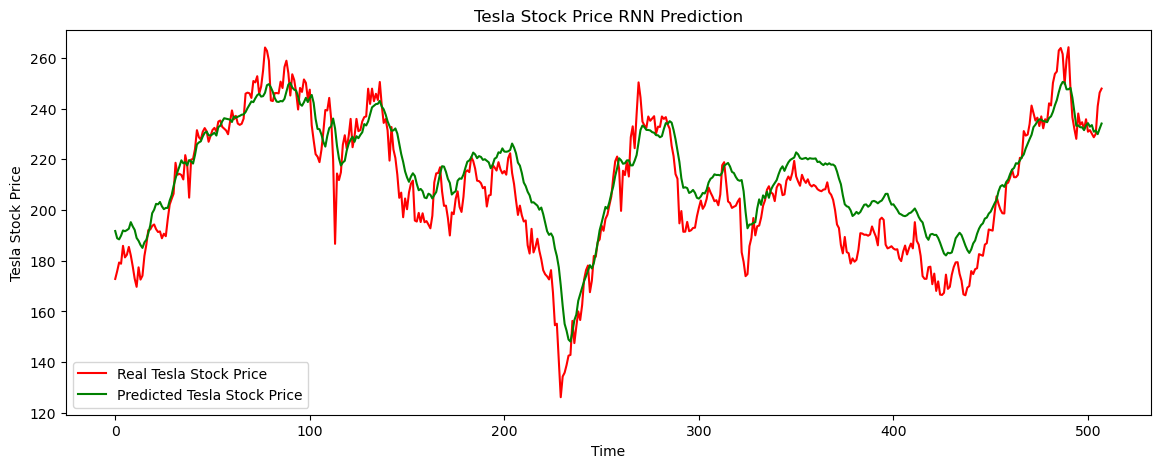

In [127]:
plt.figure(figsize=(14,5))
plt.plot(y_rnn,color="red",label="Real Tesla Stock Price")
plt.plot(y_predrnn,color="green",label="Predicted Tesla Stock Price")
plt.title("Tesla Stock Price RNN Prediction")
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

### 14 days

In [128]:
last_60 = []
for i in range(60):
    last_60.append(X_test[507][i].tolist())

In [129]:
predict_14_day = []

In [130]:
for i in range(14):
    tmp = np.array(last_60)
    next_day = regressor_RNN.predict(tmp.reshape(1,60,5))
    predict_14_day.append(next_day.reshape(5).tolist())
    last_60.append(next_day.reshape(5).tolist())
    last_60 = last_60[1:]

1/1 [==============================] - 0s 29ms/step


In [131]:
predict_14_day = predict_14_day/scaler.scale_
predict_14_day

array([[2.34081495e+02, 2.34641576e+02, 2.29128655e+02, 2.30408027e+02,
        4.40548417e+06],
       [2.35333492e+02, 2.34566414e+02, 2.28236076e+02, 2.29827462e+02,
        4.43146359e+06],
       [2.33557960e+02, 2.32991022e+02, 2.26943149e+02, 2.29594805e+02,
        4.37063104e+06],
       [2.33751138e+02, 2.33793942e+02, 2.28624827e+02, 2.30189125e+02,
        4.20542569e+06],
       [2.33662285e+02, 2.33544166e+02, 2.28361499e+02, 2.30302780e+02,
        3.91707004e+06],
       [2.33521222e+02, 2.32414801e+02, 2.27757640e+02, 2.29016157e+02,
        3.76357247e+06],
       [2.31537008e+02, 2.32027804e+02, 2.26884187e+02, 2.28652561e+02,
        3.68253131e+06],
       [2.31301573e+02, 2.31723044e+02, 2.26070567e+02, 2.27457622e+02,
        3.68251917e+06],
       [2.30909861e+02, 2.31733805e+02, 2.25712981e+02, 2.27826098e+02,
        3.74928068e+06],
       [2.31671873e+02, 2.31367478e+02, 2.25522521e+02, 2.26953584e+02,
        3.81942000e+06],
       [2.31154035e+02, 2.3123

In [132]:
plot14nextday(y_rnn,predict_14_day)

### 7 weeks

In [133]:
last_60 = []
for i in range(60):
    last_60.append(X_test[507][i].tolist())

predict_7_week = []

for i in range(7*7):
    tmp = np.array(last_60)
    next_day = regressior.predict(tmp.reshape(1,60,5))
    if((i+1) % 7 ==0):
        predict_7_week.append(next_day.reshape(5).tolist())
    last_60.append(next_day.reshape(5).tolist())
    last_60 = last_60[1:]

predict_7_week/scaler.scale_

1/1 [==============================] - 0s 37ms/step


array([[2.18940035e+02, 2.25883393e+02, 2.17966304e+02, 2.22027828e+02,
        5.92123250e+06],
       [2.11930971e+02, 2.18754046e+02, 2.11045444e+02, 2.14937892e+02,
        6.02180714e+06],
       [2.06729030e+02, 2.13409132e+02, 2.05898717e+02, 2.09570563e+02,
        6.13772240e+06],
       [2.02985599e+02, 2.09544433e+02, 2.02197930e+02, 2.05681135e+02,
        6.23129080e+06],
       [2.00219515e+02, 2.06682605e+02, 1.99466308e+02, 2.02802940e+02,
        6.30195150e+06],
       [1.98142483e+02, 2.04530206e+02, 1.97415559e+02, 2.00640951e+02,
        6.35468372e+06],
       [1.96568804e+02, 2.02897931e+02, 1.95861060e+02, 1.99003327e+02,
        6.39380313e+06]])

# MLP

In [134]:
n_input = X_train.shape[1] * X_train.shape[2]
X = X_train.reshape((X_train.shape[0], n_input))

In [135]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=n_input))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=5))
model.compile(optimizer = "adam", loss = "mean_squared_error",metrics = ["accuracy"])

In [136]:
model.fit(X, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
36/36 [==============================] - 1s 2ms/step - loss: 0.0061 - accuracy: 0.1628
Epoch 2/50
36/36 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.1717
Epoch 3/50
36/36 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.2349
Epoch 4/50
36/36 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.2714
Epoch 5/50
36/36 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.3158
Epoch 6/50
36/36 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.3372
Epoch 7/50
36/36 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.3354
Epoch 8/50
36/36 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.2963
Epoch 9/50
36/36 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.3381
Epoch 10/50
36/36 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.3488
Epoch 11/50
36/36 [

In [137]:
X_test_flatten = X_test.reshape((X_test.shape[0], n_input))

In [138]:
y_pred_MLP = model.predict(X_test_flatten)

16/16 [==============================] - 0s 2ms/step


In [139]:
y_pred_MLP = y_pred_MLP*scale
y_pred_MLP.shape

(508, 5)

In [140]:
y_mlp = y_test[:,0]*scale
y_predmlp = y_pred_MLP[:,0]

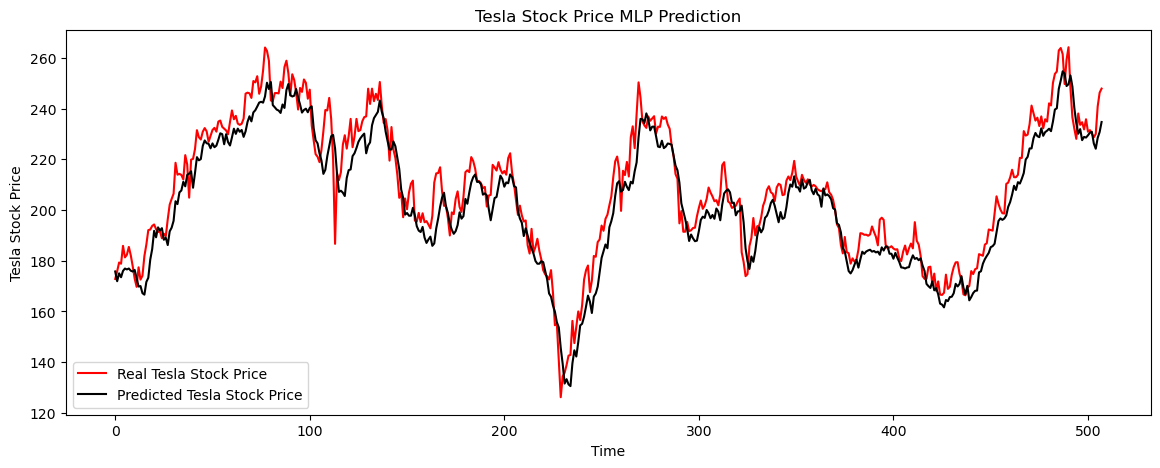

In [141]:
plt.figure(figsize=(14,5))
plt.plot(y_mlp,color="red",label="Real Tesla Stock Price")
plt.plot(y_predmlp,color="black",label="Predicted Tesla Stock Price")
plt.title("Tesla Stock Price MLP Prediction")
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

### 14 days

In [142]:
last_60 = []
for i in range(60):
    last_60.append(X_test[507][i].tolist())
predict_14_day = []
for i in range(14):
    tmp = np.array(last_60)
    next_day = model.predict(tmp.reshape(1,300))
    predict_14_day.append(next_day.reshape(5).tolist())
    last_60.append(next_day.reshape(5).tolist())
    last_60 = last_60[1:]
predict_14_day = predict_14_day/scaler.scale_
predict_14_day

1/1 [==============================] - 0s 29ms/step


array([[2.34685223e+02, 2.38984748e+02, 2.35284225e+02, 2.36450778e+02,
        5.83411721e+06],
       [2.29895678e+02, 2.37353440e+02, 2.32817498e+02, 2.33954686e+02,
        6.10729232e+06],
       [2.30210886e+02, 2.37112246e+02, 2.33290714e+02, 2.32721314e+02,
        6.84986782e+06],
       [2.24962577e+02, 2.33684827e+02, 2.29287602e+02, 2.30165029e+02,
        6.85535213e+06],
       [2.26109617e+02, 2.30663600e+02, 2.25616193e+02, 2.28703074e+02,
        6.53285683e+06],
       [2.21674058e+02, 2.28482031e+02, 2.22550953e+02, 2.25235117e+02,
        6.36523226e+06],
       [2.19841396e+02, 2.21865536e+02, 2.16493880e+02, 2.20947204e+02,
        6.34013083e+06],
       [2.19843371e+02, 2.24614547e+02, 2.18871872e+02, 2.19051795e+02,
        5.60436007e+06],
       [2.19092898e+02, 2.21491805e+02, 2.16202946e+02, 2.19812458e+02,
        5.67596915e+06],
       [2.15672541e+02, 2.19340963e+02, 2.14270374e+02, 2.15556680e+02,
        5.89415595e+06],
       [2.16866063e+02, 2.1930

In [143]:
plot14nextday(y_mlp,predict_14_day)

### 7 weeks

In [144]:
last_60 = []
for i in range(60):
    last_60.append(X_test[507][i].tolist())

predict_7_week = []

for i in range(7*7):
    tmp = np.array(last_60)
    next_day = model.predict(tmp.reshape(1,300))
    if((i+1) % 7 ==0):
        predict_7_week.append(next_day.reshape(5).tolist())
    last_60.append(next_day.reshape(5).tolist())
    last_60 = last_60[1:]

predict_7_week/scaler.scale_

1/1 [==============================] - 0s 26ms/step


array([[2.19841396e+02, 2.21865536e+02, 2.16493880e+02, 2.20947204e+02,
        6.34013083e+06],
       [2.11470701e+02, 2.15419855e+02, 2.09381311e+02, 2.13278282e+02,
        4.92094451e+06],
       [2.02600749e+02, 2.06590605e+02, 2.03351559e+02, 2.02557783e+02,
        2.81893383e+06],
       [1.91107006e+02, 1.94312136e+02, 1.91379638e+02, 1.91528630e+02,
        4.83647835e+06],
       [1.90150569e+02, 1.96119286e+02, 1.92046066e+02, 1.92148256e+02,
        3.01447182e+06],
       [1.78682656e+02, 1.84224506e+02, 1.79683985e+02, 1.79207362e+02,
        2.75542647e+06],
       [1.71160140e+02, 1.75247520e+02, 1.72108942e+02, 1.71301820e+02,
        3.09487263e+06]])

## XGBoost

In [145]:
X_train = []
y_train = []

In [146]:
data_training = data_training.drop(['Date','Adj Close'],axis=1)

In [147]:
# for i in range(60,length_train):
#     X_train.append(data_training[i-60:i])
#     y_train.append(data_training[i])

In [148]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

ValueError: ('Expecting 2 dimensional numpy.ndarray, got: ', (0,))